# Tutorial about transforming LocData

Locan provides methods for transforming localization data sets into new LocData objects.

## Setting things up

In [1]:
from pathlib import Path

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import locan as lc

In [2]:
lc.show_versions(system=False, dependencies=False, verbose=False)


Locan:
   version: 0.7.dev3+gb9aca40

Python:
   version: 3.8.8


## Spatially randomize a structured set of localizations

Assume that localizations are somehow structured throughout a region. Often it is helpful to compare analysis results to a similar dataset in which localizations are homogeneously Poisson distributed. A LocData object with this kind of data can be provided by the randomize function.

In [3]:
locdata = lc.simulate_Thomas(n_samples=1000, n_features=2, centers=10, feature_range=(0, 1000), cluster_std=10, seed=1)
locdata_random = lc.randomize(locdata, hull_region='bb')

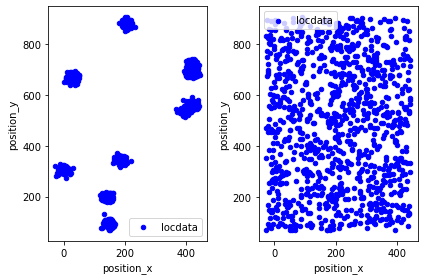

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2)
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax[0], color='Blue', label='locdata')
locdata_random.data.plot.scatter(x='position_x', y='position_y', ax=ax[1], color='Blue', label='locdata')
plt.tight_layout()
plt.show()

In [5]:
print('Area of bounding box for structured data: {:.0f}'.format(locdata.properties['region_measure_bb']))
print('Area of bounding box for randomized data: {:.0f}'.format(locdata_random.properties['region_measure_bb']))
print('Ratio: {:.4f}'.format(locdata_random.properties['region_measure_bb'] / locdata.properties['region_measure_bb']))

Area of bounding box for structured data: 397093
Area of bounding box for randomized data: 395306
Ratio: 0.9955


Regions other from bounding box can be specified as RoiRegion instance.

In [6]:
region = lc.ConvexHull(locdata.coordinates).region
locdata_random = lc.randomize(locdata, hull_region=region)

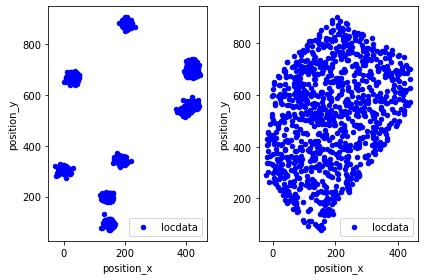

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2)
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax[0], color='Blue', label='locdata')
locdata_random.data.plot.scatter(x='position_x', y='position_y', ax=ax[1], color='Blue', label='locdata')
plt.tight_layout()
plt.show()

In [8]:
print('Area of bounding box for structured data: {:.0f}'.format(locdata.properties['region_measure_bb']))
print('Area of bounding box for randomized data: {:.0f}'.format(locdata_random.properties['region_measure_bb']))
print('Ratio: {:.4f}'.format(locdata_random.properties['region_measure_bb'] / locdata.properties['region_measure_bb']))

Area of bounding box for structured data: 397093
Area of bounding box for randomized data: 380291
Ratio: 0.9577


## Apply an affine transformation to localization coordinates

A wrapper function provides affine transformations based on either numpy or open3d methods.

In [9]:
matrix = ((-1, 0), (0, -1))
offset = (10, 10)
pre_translation = (100, 100)

locdata_transformed = lc.transform_affine(locdata, matrix, offset, pre_translation, method='numpy')

<AxesSubplot:xlabel='position_x', ylabel='position_y'>

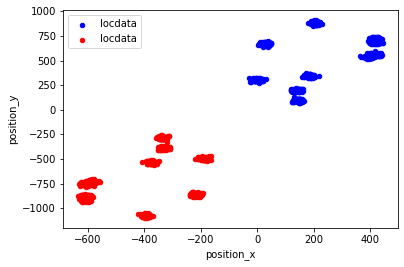

In [10]:
fig, ax = plt.subplots()
locdata.data.plot.scatter(x='position_x', y='position_y',color='Blue', label='locdata', ax=ax)
locdata_transformed.data.plot.scatter(x='position_x', y='position_y', color='Red', label='locdata', ax=ax);

## Apply a BunwarpJ transformation to localization coordinates

Often a transformation matrix was computed using ImageJ. The `bunwarp` function allows applying a transformation from the raw matrix of the ImageJ/Fiji plugin BunwarpJ.

In [11]:
matrix_path = lc.constants.ROOT_DIR / 'tests/test_data/transform/BunwarpJ_transformation_raw_green.txt'
dat_green = lc.load_rapidSTORM_file(path=lc.constants.ROOT_DIR /
                                 'tests/test_data/transform/rapidSTORM_beads_green.txt')

dat_green_transformed = lc.bunwarp(locdata=dat_green, matrix_path=matrix_path, pixel_size=(10, 10))

<AxesSubplot:xlabel='position_x', ylabel='position_y'>

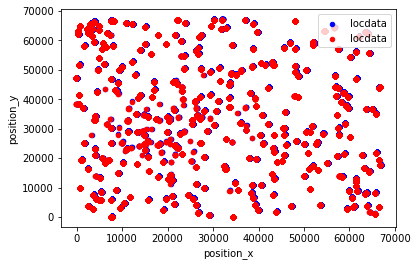

In [12]:
fig, ax = plt.subplots()
dat_green.data.plot.scatter(x='position_x', y='position_y',color='Blue', label='locdata', ax=ax)
dat_green_transformed.data.plot.scatter(x='position_x', y='position_y', color='Red', label='locdata', ax=ax);